<h2>Logistic Regression Classifier</h2>
<p>This dataset is a suedo dataset of spam/non-spam email with 57 dimensions with one binary target y.</p>
<p>The data consists of examples of spam and non-spam emails, of which there are 4508 training examples and 93 testing examples. The feature vector x is a 57-dimensional vector extracted from the email and y = 1 indicates a spam email. The data has been preprocessed such that the first 54-dimensions of each observation is binary and the last three dimensions are positive numbers.</p>

In [1]:
import pandas as pd
import numpy as np
PATH = 
train_x =pd.read_csv(PATH+'/X_train.csv',header=None)
train_y =pd.read_csv(PATH+'/y_train.csv',header=None)
test_x =pd.read_csv(PATH+'/X_test.csv',header=None)
test_y =pd.read_csv(PATH+'/y_test.csv',header=None)

In [2]:
#add one dimension for offset. 
train_x[57] = 1.0
#y: 0,1 to -1,+1
train_y[train_y.iloc[:,0]==0] = -1.0
train_x_1 = train_x
train_x_1['y'] = train_y
train_x_1= train_x_1.drop('y',axis=1)
train_x = train_x.drop('y',axis=1)
wt = np.mat([0.0]*58).T
train_x = np.mat(train_x).T
train_y = np.mat(train_y)
train_x_1 = np.mat(train_x_1).T

In [3]:
#steepest ascent algorithm
def eta(t): 
    return 1/(pow(10,5)*np.sqrt(t+1))

def sigmoid(w,x,y): #x,w are n-dimension y =+1/-1
    if y*x.T*w<=-100:
        return 0.0
    elif y*x.T*w<= 100:
        return np.exp(float(y*x.T*w))/(1+np.exp(float(y*x.T*w)))
    else:
        return 1.0

def sum_in_iter(w,x,y):
    s = 0
    L = 0
    for i in range(0,len(y)):
        sigmoid_value = sigmoid(w,x[:,i],y[i,0])
        s += (1-sigmoid_value)*y[i,0]*x[:,i]
        if sigmoid_value == 0:
            L += float(y[i,0]*x[:,i].T*w)
        else:
            L += np.log(sigmoid_value)
    return s,L

In [ ]:
L=[np.nan]*10000
for t in range(1,10001):
    sum_iter, L[t-1] = sum_in_iter(wt,train_x,train_y)
    wt += eta(t)*sum_iter

In [ ]:
plt.plot(L)

In [23]:
#Newton’s method
wt = np.mat([0.0]*58).T

def eta(t): 
    return 1/np.sqrt(t+1)

#sigmoid(w,x,y)
def L_2(x,w):
    s = 0
    for i in range(0,len(x.T)):
        s -= sigmoid(w,x[:,i],1)*(1-sigmoid(w,x[:,i],1))*x[:,i]*x[:,i].T
    return s

L=list()
for t in range(1,101):
    sum_iter, L_val = sum_in_iter(wt,train_x,train_y)
    wt -= eta(t)*pow(L_2(train_x_1,wt),-1)*sum_iter
    L.append(L_val)

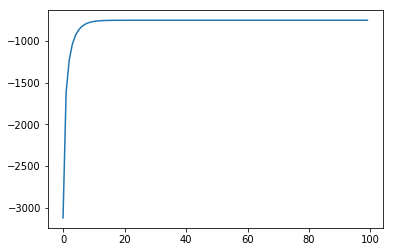

In [25]:
plt.plot(L)

In [50]:
#classifier
pred_y = list()
test_x = pd.read_csv(PATH+'/X_test.csv',header=None)
test_x[57] = 1.0
test_x = np.mat(test_x).T
test_y[test_y.iloc[:,0]==0] = -1.0

In [52]:
for i in range(0,len(test_x.T)):
    pre = test_x[:,i].T*wt
    if pre > 0: pred_y.append(1)
    else: pred_y.append(-1)

In [53]:
accuracy(test_y,pred_y)

0.91397849462365588